In [23]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as sts

### 1. Нормальное распределение и стандартное нормальное распределение

**Нормальное распределение** — это непрерывное распределение, значения в котором в основном сосредоточены вокруг среднего. Это распределение имеет форму колокола и описывается двумя параметрами: средним значением $\mu$ и стандартны отклонением $\sigma$.</br></br>
**Стандартное нормальное распределение** — частный случай нормального распределения, когда μ = 0, σ = 1

Случайная величина $X$ распределена по нормальному закону со средним $\mu$  и дисперсией $\sigma ^{2}$ <br/><br/>
$X \sim N(\mu, \sigma^2)$

Постоим **стандартное** нормальное распределение:

In [3]:
#задаем непрерывное нормальное распределение с математическим ожиданием 0 и стандартным отклонением 1
mu = 0
sigma = 1
norm_rv = sts.norm(loc=mu, scale=sigma) #задаем параметры распределения
X = norm_rv.rvs(size=1000) #задаем количество значений

In [24]:
X[:10]

array([ 1.062281  ,  0.49782307,  0.08316275,  0.21666952, -1.22688206,
        0.24792843,  0.56337714, -0.72084673, -1.13805293,  0.67002538])

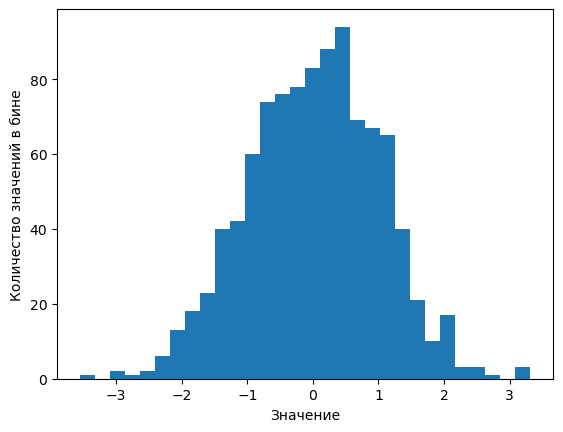

In [25]:
#строим гистограмму для распределения
plt.hist(X, bins=30) #указываем количество бинов (диапазонов)
plt.xlabel('Значение')
plt.ylabel('Количество значений в бине')
plt.show()

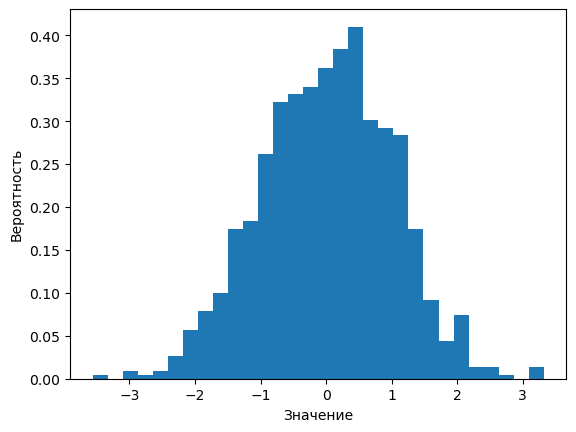

In [6]:
#с помощью параметра density=True можно поменять по оси Y кол-во значений в бине на вероятность
plt.hist(X, bins=30, density=True)
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.show()

Площадь гистограммы = 1. Сумма вероятностей всех значений = 1.

Мы не можем расчитать вероятность отдельно взятого значения, потому что их бесконечно много.</br>
Но мы можем расчитать вероятность попадания значения в определенный диапозон значения (в определенный бин или несколько бинов).

**Построим функцию плотности вероятностей**

Функия плотности вероятности **стандартного** нормального распределения задается формулой:

${\displaystyle \varphi (x)={\frac {1}{\sqrt {2\pi }}}e^{-{\frac {1}{2}}x^{2}}.}$

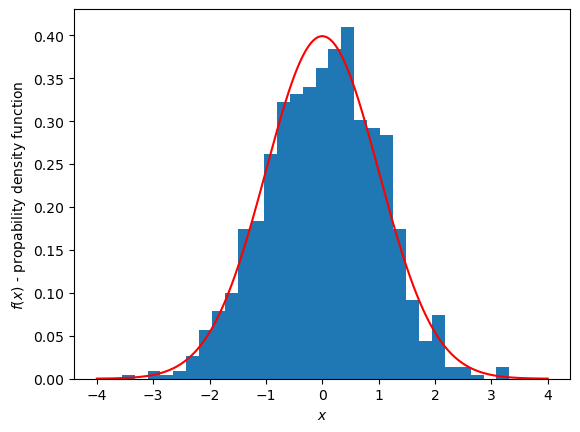

In [26]:
plt.hist(X, bins=30, density=True)

x = np.linspace(-4,4,1000) #cоздает массив из 1000 равномерно-распределенных точек. 
pdf = norm_rv.pdf(x)#вычисляем функцию плотности вероятности нормального распределения для каждого значения x

plt.plot(x, pdf,color='red')
plt.ylabel('$f(x)$ - propability density function')
plt.xlabel('$x$')
plt.show()

У нас получилась колоколообразная плотность вероятности. Среднее значение $\mu$ находится ровно по центру графика. А если разделить график по центру, то левая часть симметрична правой части

**Построим функцию распеделения вероятностей**

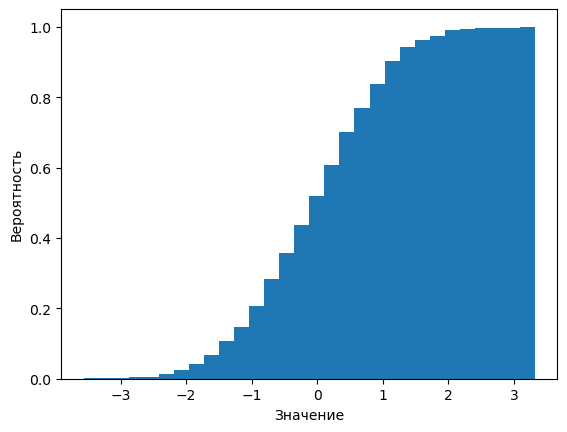

In [27]:
#для начала можно построить куммулятивную гистограмму
plt.hist(X, bins=30, density=True, cumulative = True)
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.show()

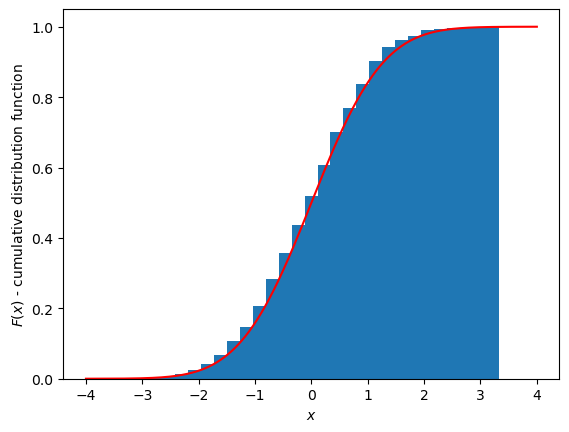

In [28]:
x = np.linspace(-4,4,1000)
cdf = norm_rv.cdf(x)
plt.hist(X, bins=30, density=True, cumulative = True)
plt.plot(x, cdf, color = 'r')
plt.ylabel('$F(x)$ - cumulative distribution function')
plt.xlabel('$x$')
plt.show()

### 2. Задачи на PDF и CDF

Нарисуем графики PDF и CDF рядом для непрерывного нормального распределения и посмотрим связь между ними

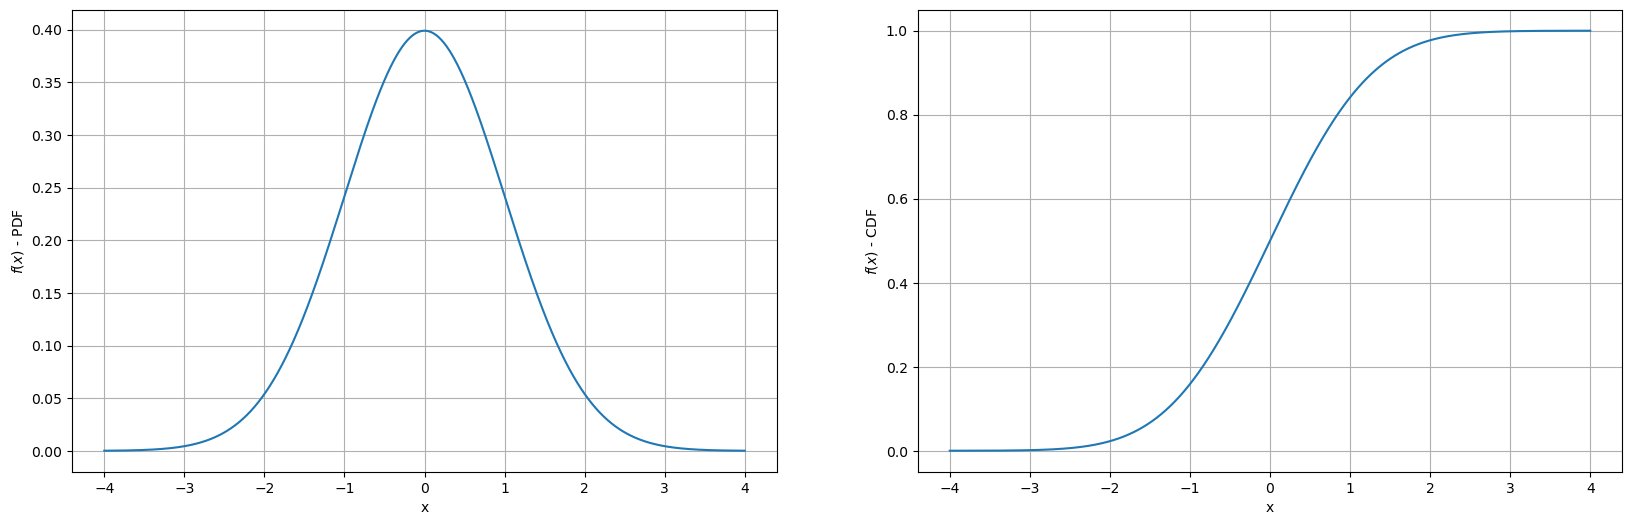

In [29]:
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(20, 6))

#PDF
x = np.linspace(-4,4,1000)
pdf = norm_rv.pdf(x)
axs[0].plot(x, pdf)
axs[0].grid(True)
axs[0].set_xlabel('x')
axs[0].set_ylabel('$f(x)$ - PDF')



#CDF
cdf = norm_rv.cdf(x)
axs[1].plot(x, cdf)
axs[1].grid(True)
axs[1].set_xlabel('x')
axs[1].set_ylabel('$f(x)$ - CDF')


plt.show()

Зная PDF, можно построить CDF. Для этого нужно проинтегрировать функцию PDF. </br>
Зная функцию CDF, можно посторить PDF, продифференцировав функцию CDF.

В библиотеке scipy заложен функционал перехода от PDF к СDF и наоборот.

#### Задачи

Давайте на примере задач посмотрим как мы пользоваться методами .сdf() и ppf()

percent point function (сокращено ppf)- это обратная функция распределения вероятности или функция процентных значений.

**Задача №1**: Найти вероятность того, что случайная величина Х примет значение меньше $-2$

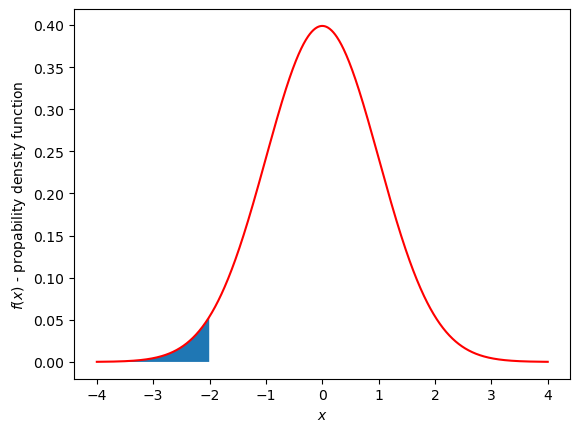

In [30]:
x = np.linspace(-4,4,1000) #cоздает массив из 1000 равномерно-распределенных точек.
pdf = norm_rv.pdf(x)#вычисляем функцию плотности вероятности нормального распределения для каждого значения x
plt.plot(x, pdf, color ='r')
plt.fill_between(x, pdf, where=(x >= -4) & (x <= -2))
plt.ylabel('$f(x)$ - propability density function')
plt.xlabel('$x$')
plt.show()

In [31]:
norm_rv.cdf(-2)

0.022750131948179195

**Задача №2**: Найти вероятность того, что случайная величина Х примет значение больше $-2$

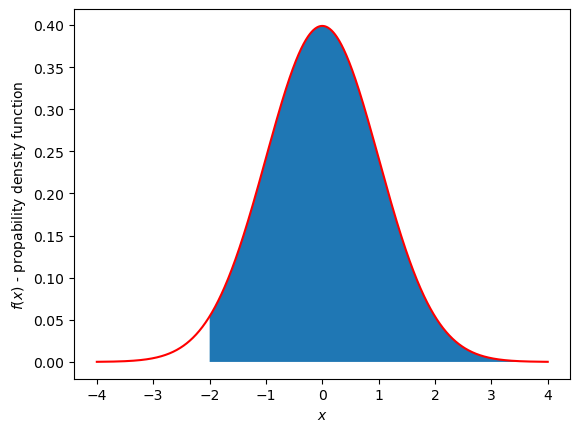

In [32]:
x = np.linspace(-4,4,1000) #cоздает массив из 1000 равномерно-распределенных точек. 
pdf = norm_rv.pdf(x)#вычисляем функцию плотности вероятности нормального распределения для каждого значения x
plt.plot(x, pdf, color ='r')
plt.fill_between(x, pdf, where=(x >= -2) & (x <= 4))
plt.ylabel('$f(x)$ - propability density function')
plt.xlabel('$x$')
plt.show()

In [33]:
1-norm_rv.cdf(-2)

0.9772498680518208

**Задача №3**: Найти вероятность того, что случайная величина Х примет значение в диапазоне от $-2$ до 2

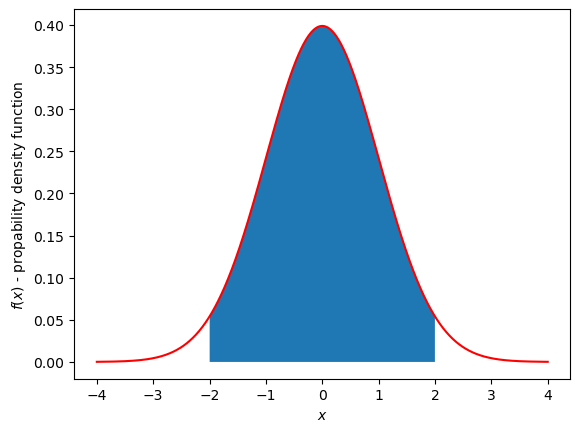

In [34]:
x = np.linspace(-4,4,1000) #cоздает массив из 1000 равномерно-распределенных точек. 
#Кстати про равномерное распределение мы тоже поговорим позднее, на следующем уроке.
pdf = norm_rv.pdf(x)#вычисляем функцию плотности вероятности нормального распределения для каждого значения x
plt.plot(x, pdf, color ='r')
plt.fill_between(x, pdf, where=(x >= -2) & (x <= 2))
plt.ylabel('$f(x)$ - propability density function')
plt.xlabel('$x$')
plt.show()

In [35]:
norm_rv.cdf(2)

0.9772498680518208

In [17]:
norm_rv.cdf(-2)

0.022750131948179195

In [18]:
norm_rv.cdf(2)-norm_rv.cdf(-2)

0.9544997361036416

**Задача №4**: найти значение, которое соответсвует вероятности 0.9

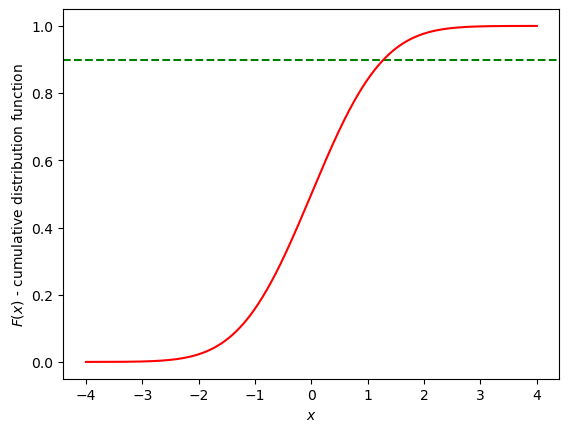

In [19]:
x = np.linspace(-4,4,1000)
cdf = norm_rv.cdf(x)
plt.axhline(y=0.9, color='g', linestyle='--')
plt.plot(x, cdf, color = 'r')
plt.ylabel('$F(x)$ - cumulative distribution function')
plt.xlabel('$x$')
plt.show()

In [20]:
norm_rv.ppf(0.9)

1.2815515655446004

### 3. Сравнение нормальных распределений

In [36]:
#задаем параметры для трех нормальных распределений
norm_rv1 = sts.norm(loc=0, scale=1) 
norm_rv2 = sts.norm(loc=0, scale=2) 
norm_rv3 = sts.norm(loc=1, scale=0.5) 

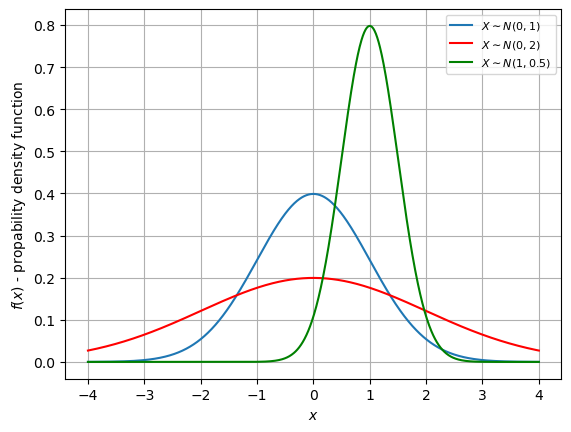

In [37]:
x = np.linspace(-4,4,1000)

pdf = norm_rv1.pdf(x)
plt.plot(x, pdf,  label='$X \sim N(0, 1)$')


pdf = norm_rv2.pdf(x)
plt.plot(x, pdf, color = 'r',  label='$X \sim N(0, 2)$')


pdf = norm_rv3.pdf(x)
plt.plot(x, pdf, color = 'g',  label='$X \sim N(1, 0.5)$')

plt.grid(True)

plt.ylabel('$f(x)$ - propability density function')
plt.xlabel('$x$')

plt.legend(fontsize=8, loc=1)

plt.show()